In [8]:
import torch
import matplotlib.pyplot as plt

In [2]:
class AE(torch.nn.Module):
    def __init__(_,vsize,hsize):   #vsize, tamaño de la entrada, hsize de la capa oculata, la salida tiene vsize
        super().__init__()
        _.L1 = torch.nn.Linear( vsize,hsize)  #Aplica una transformacion lineal que va de vsize a hsize
        _.L2 = torch.nn.Linear( hsize,vsize)  #Aplica otra transformacion lineal que va de hsize a vsize
    
    
    def enc(_,x):                    #Encoder
        return torch.tanh(_.L1(x))   #aplica hace la transformacion lineal y aplica tanh
    
    def dec(_,h):                    #Decoder
        return torch.tanh(_.L2(h))   #Lo mismo que dec
    
#    def foward(_,x):                Forward alternativo
#        h=_.encode(x)
#        out=_.dec(h)
#        return out
    
    def forward(_,x):
        return _.dec(_.enc(x))
    
    #La parte de encoder y decoder se pueder resumir utilizando sequential

# Ejercicio:

Queremos probar que el autoencoder puede encontrar una buena solución decorrelacionando variables.
Pasamos de un espacio de mayor dimension a una de menor donde las variables estan decorrelacionadas

In [13]:
N=10
M=3
P=1000
m=torch.randn(M,N)     #Esto es una matriz de mezcla

z=torch.randn(P,M)   #Estas son las variables independientes

x=torch.tanh(torch.mm(z,m))      #la multiplicacion de z.m, Este va a ser el dataset

#z: conjunto de valores independientes
#multiplicamos por una combinacion lineal y me lo pasa a dimesion 10
#cada instacia a es una combinacion linal de las tres variables independientes
#la idea que el autoencoder pueda separar esas 3 representaciones disferente en 3 disferentes clases

In [4]:
E,t=1.0,0                              #Condiciones iniciales

E_list = list()                      #Creo listas para graficar el error
t_list =list()

E_list.append(E)
t_list.append(t)

In [5]:
modelo=AE(N,M)               #definimos el modelo
optim=torch.optim.SGD(modelo.parameters(),lr=0.1)   #Seteo como hacer la optimización
costf=torch.nn.MSELoss()
modelo.train()     #esto hace que los calculos sean hechos como si estuviera entrenando
T=20
while E>1E-3 and t<1000:
    optim.zero_grad()
    y = modelo(x)
    loss = costf( y, x)
    loss.backward()
    optim.step()
    E = loss.item()    #Me devuelve el 
   

    E_list.append(E)    
    t_list.append(t)
    t+=1
    if t%100==0:
        print(t,E)


100 0.18767592310905457
200 0.10749050229787827
300 0.06388067454099655
400 0.046977099031209946
500 0.03919251263141632
600 0.03457669913768768
700 0.03133562579751015
800 0.028838302940130234
900 0.026819322258234024
1000 0.02514287456870079


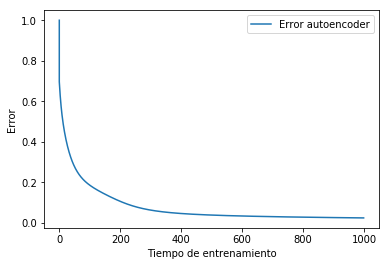

In [12]:
plt.figure(1)
plt.plot(t_list,E_list,label='Error autoencoder')
plt.ylabel("Error")
plt.xlabel("Tiempo de entrenamiento")
plt.legend()
plt.show()